<a href="https://colab.research.google.com/github/SrutiGoteti/IIIT-AI-ML-labs-and-projects/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).

A few ways to explore:

1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# "Exploring Linguistic Patterns using Word-Level N-grams and Word Cloud for Hindi and Telugu texts"

In [38]:
# NOTE: To run this notebook in Google Colab,
# you need to mount your Google Drive by running the following cell and authorizing access:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
!pip install requests beautifulsoup4 nltk wordcloud matplotlib --quiet

import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Install & Import:
Installs needed libraries quietly. Imports tools for text processing, web scraping, counting, and plotting.

Download NLTK models:
Downloads tokenizer data to split text into words.

In [24]:
def fetch_and_clean_text(url, language):
    response = requests.get(url)
    response.encoding = 'utf-8'
    html = response.text

    soup = BeautifulSoup(html, 'html.parser')

    for tag in soup(['script', 'style', 'img', 'noscript', 'iframe', 'audio', 'video']):
        tag.decompose()

    text_elements = soup.find_all(['p', 'div', 'span', 'li'])
    text = ' '.join([element.get_text(separator=' ', strip=True) for element in text_elements])

    if language == 'telugu':
        pattern = re.compile(r'[^\u0C00-\u0C7F\s]+')
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]+')
    else:
        raise ValueError("Unsupported language")

    cleaned_text = pattern.sub('', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text


fetch_and_clean_text:
Gets the webpage text, removes unwanted tags, and picks text from main parts. Then keeps only letters for Telugu or Hindi by filtering Unicode. Returns clean text.

In [25]:
telugu_url = "https://www.gotelugu.com/issue26/728/telugu-columns/lal-bahadur-shastri-biography/"
hindi_url = "https://digitalbhandari.in/blog-kya-hai/"

telugu_text = fetch_and_clean_text(telugu_url, 'telugu')
print("Sample Telugu text:", telugu_text[:500], "\n")

hindi_text = fetch_and_clean_text(hindi_url, 'hindi')
print("Sample Hindi text:", hindi_text[:500], "\n")

Sample Telugu text: ఈ సంచికలో కథలు సీరియల్స్ శీర్షికలు సినిమా కార్టూన్లు ఈ సంచికలో శీర్షికలు జాతి గుర్తుంచు కోవలసిన ఆదర్శ నేత శ్రీ లాల్ బహదూర్ శాస్త్రి జె వి కుమార్ చేపూరి శ్రీ లాల్ బహదూర్ శాస్త్రి భారత దేశపు రెండవ ప్రధాన మంత్రి శ్రీ లాల్ బహదూర్ శాస్త్రి ఉత్తర ప్రదేశ్ లోని ముఘల్సరాయిలో వ సంవత్సరం అక్టోబర్ వ తేదీన శ్రీవాస్తవ కాయస్థ కుటుంబంలో శారదా ప్రసాద్ శ్రీవాస్తవ రామదులారి దేవి దంపతులకు జన్మించారు లాల్ బహదూర్ శాస్త్రి తండ్రి మొదట బడి పంతులు గా పనిచేసి తరువాత అలహాబాద్ లోని రెవిన్యూ కార్యాలయంలో గుమాస్తాగా స్థిర పడ్ 

Sample Hindi text: पैसे कैसे कमाए ब्लॉगिंग शुरू करें फ्री में पैसे कैसे कमाए पैसे कैसे कमाए ब्लॉगिंग शुरू करें फ्री में पैसे कैसे कमाए पैसे कैसे कमाए ब्लॉगिंग शुरू करें फ्री में पैसे कैसे कमाए पैसे कैसे कमाए ब्लॉगिंग शुरू करें फ्री में पैसे कैसे कमाए पैसे कैसे कमाए ब्लॉगिंग शुरू करें फ्री में पैसे कैसे कमाए पैसे कैसे कमाए ब्लॉगिंग शुरू करें फ्री में पैसे कैसे कमाए जानिए ब्लॉग क्या है और ब्लॉग कितने प्रकार के होते है अगर आप ब्लॉग के बारे में जानना चाहते है तो इस लेख में आपक

Load URLs and get text:
Set URLs for Telugu and Hindi pages. Use the cleaning function to get cleaned text from each site. Print first 500 characters of both.

In [27]:
hindi_tokens = word_tokenize(hindi_text)
telugu_tokens = word_tokenize(telugu_text)

print("Hindi tokens:", hindi_tokens[:10])
print("Telugu tokens:", telugu_tokens[:10])

Hindi tokens: ['पैसे', 'कैसे', 'कमाए', 'ब्लॉगिंग', 'शुरू', 'करें', 'फ्री', 'में', 'पैसे', 'कैसे']
Telugu tokens: ['ఈ', 'సంచికలో', 'కథలు', 'సీరియల్స్', 'శీర్షికలు', 'సినిమా', 'కార్టూన్లు', 'ఈ', 'సంచికలో', 'శీర్షికలు']


Tokenize text:
Split the cleaned Hindi and Telugu text into words (tokens). Show the first 10 tokens from each language.

In [57]:
hindi_unigrams = hindi_tokens
telugu_unigrams = telugu_tokens

hindi_bigrams = list(ngrams(hindi_tokens, 2))
telugu_bigrams = list(ngrams(telugu_tokens, 2))

hindi_trigrams = list(ngrams(hindi_tokens, 3))
telugu_trigrams = list(ngrams(telugu_tokens, 3))

Create n-grams:
Use the tokens to make unigrams (single words), bigrams (pairs of words), and trigrams (triplets of words) for both Hindi and Telugu texts.

In [58]:
hindi_uni_freq = Counter(hindi_unigrams)
telugu_uni_freq = Counter(telugu_unigrams)

hindi_bi_freq = Counter(hindi_bigrams)
telugu_bi_freq = Counter(telugu_bigrams)

hindi_tri_freq = Counter(hindi_trigrams)
telugu_tri_freq = Counter(telugu_trigrams)

Count frequencies:
Count how often each unigram, bigram, and trigram appears in Hindi and Telugu texts using Counter.

In [59]:
def save_wordcloud(freq_dict, title, font_path, filename):
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()


Save and show word cloud:
This creates a word cloud image from frequency data, uses the given font for the language, sets the background white, and saves the image to a file. It also shows the image in the notebook.

In [55]:
font_path_hindi = '/content/drive/My Drive/fonts/hindi.ttf'
font_path_telugu = '/content/drive/My Drive/fonts/telugu.ttf'

Font file paths:
These tell the program where to find the Hindi and Telugu font files in Google Drive. The fonts are needed so text in these languages shows correctly in word clouds

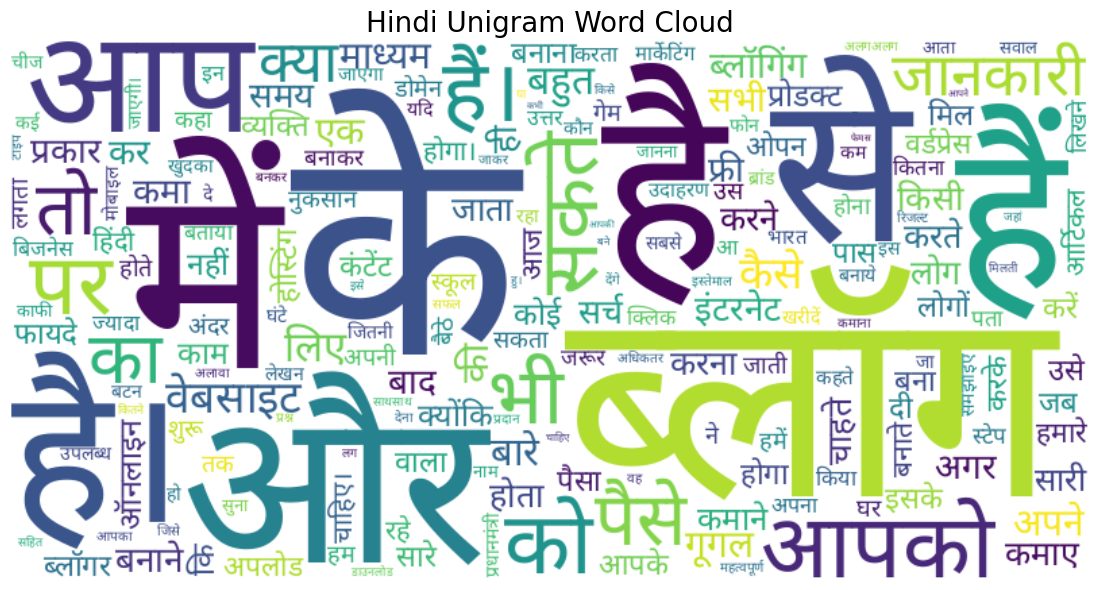

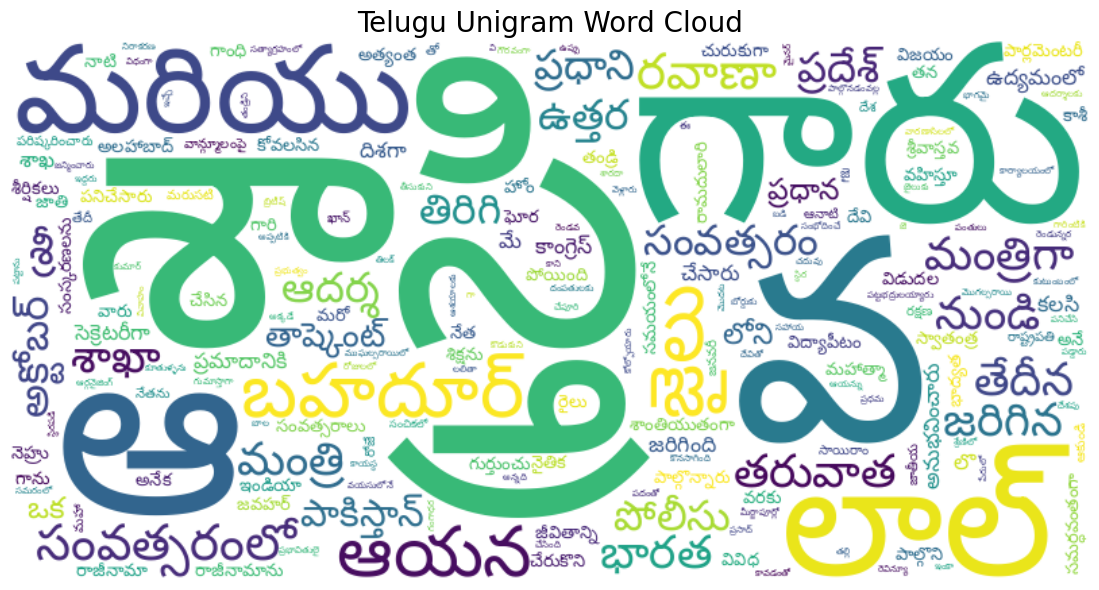

In [60]:
save_wordcloud(hindi_uni_freq, "Hindi Unigram Word Cloud", font_path=font_path_hindi, filename='hindi_unigram.png')
save_wordcloud(telugu_uni_freq, "Telugu Unigram Word Cloud", font_path=font_path_telugu, filename='telugu_unigram.png')

Generate and save word clouds:
These lines create and save word cloud images for Hindi and Telugu unigrams (single words). They use the font files to display the correct script and save the images as PNG files.

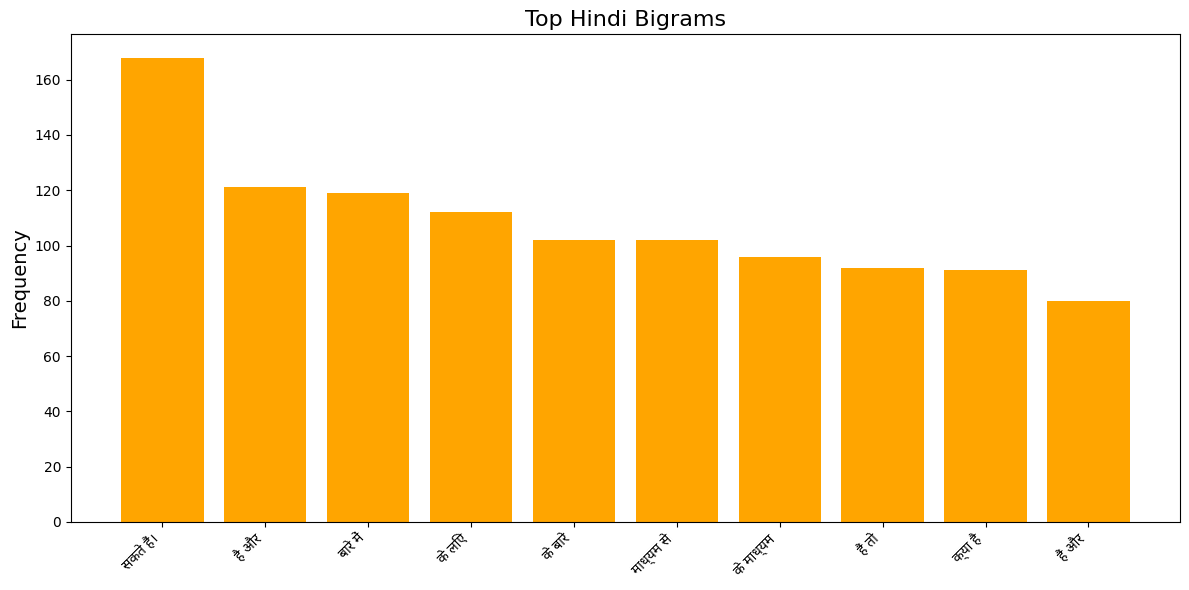

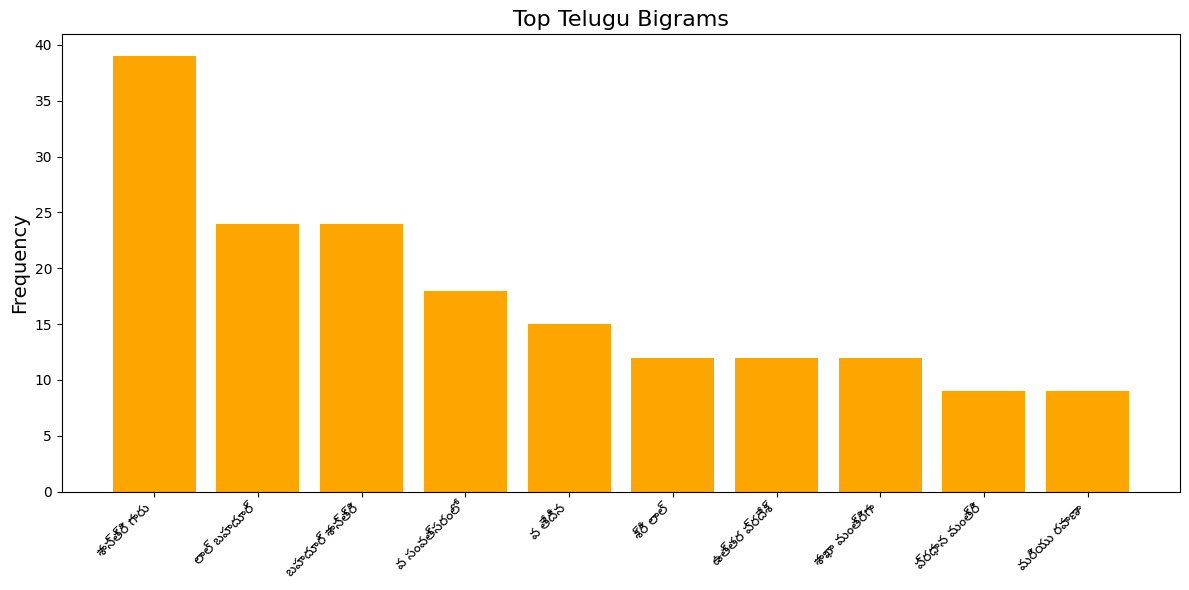

In [45]:
import matplotlib.font_manager as fm

font_path_hindi = '/content/drive/MyDrive/fonts/hindi.ttf'
font_path_telugu = '/content/drive/MyDrive/fonts/telugu.ttf'

prop_hindi = fm.FontProperties(fname=font_path_hindi)
prop_telugu = fm.FontProperties(fname=font_path_telugu)

def plot_top_bigrams(bigram_freq, title, top_n=10, font_prop=None):
    most_common = bigram_freq.most_common(top_n)
    labels = [' '.join(pair) for pair, freq in most_common]
    freqs = [freq for pair, freq in most_common]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, freqs, color='orange')
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right', fontproperties=font_prop)
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_top_bigrams(hindi_bi_freq, "Top Hindi Bigrams", font_prop=prop_hindi)

plot_top_bigrams(telugu_bi_freq, "Top Telugu Bigrams", font_prop=prop_telugu)




*   We set font paths for Hindi and Telugu fonts.
*   Create font properties to use these fonts in plots.
*   Define a function to plot top bigrams with proper fonts.
*   Show bar charts of top bigrams for Hindi and Telugu using those fonts.





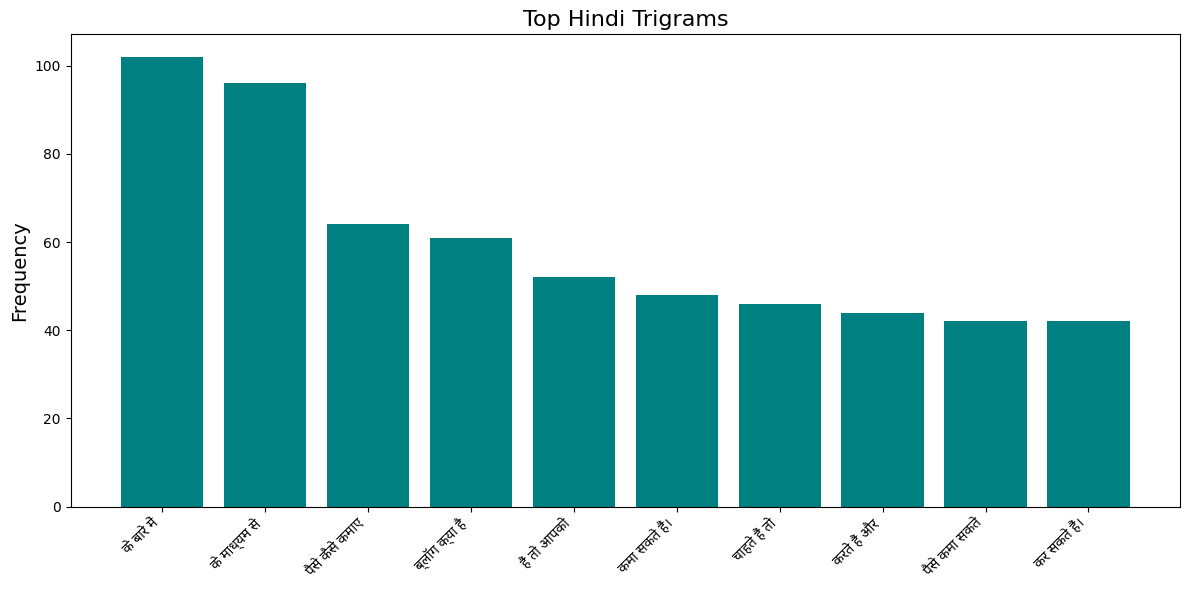

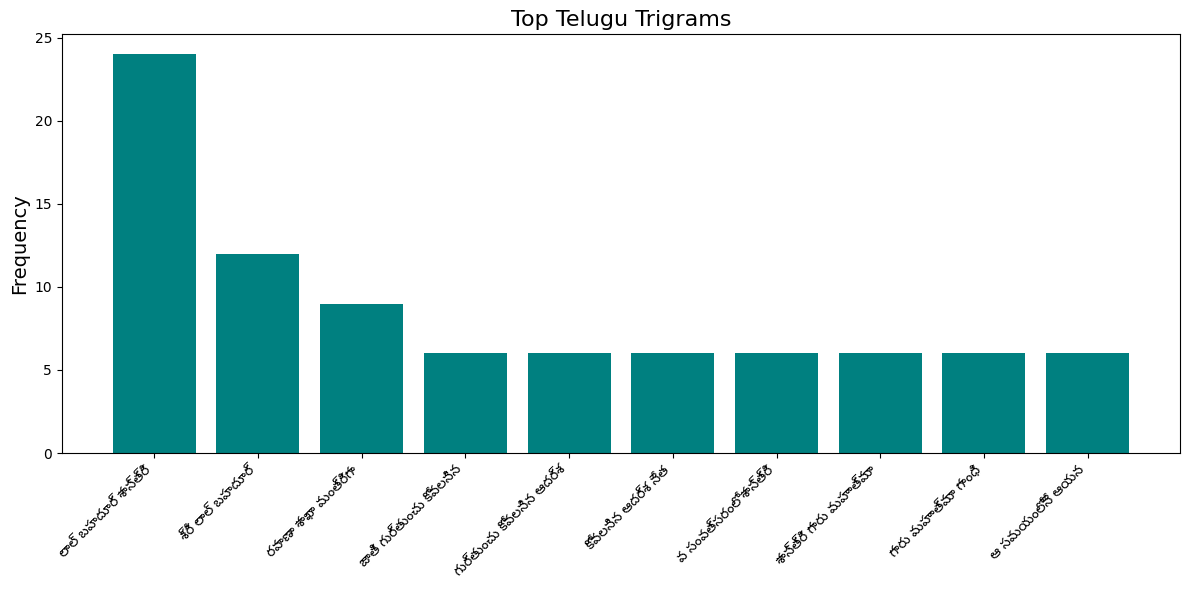

In [51]:
# Assuming font paths are already set:
font_path_hindi = '/content/drive/MyDrive/fonts/hindi.ttf'
font_path_telugu = '/content/drive/MyDrive/fonts/telugu.ttf'

prop_hindi = fm.FontProperties(fname=font_path_hindi)
prop_telugu = fm.FontProperties(fname=font_path_telugu)

def plot_top_trigrams(trigram_freq, title, top_n=10, font_prop=None):
    most_common = trigram_freq.most_common(top_n)
    labels = [' '.join(trigram) for trigram, freq in most_common]
    freqs = [freq for trigram, freq in most_common]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, freqs, color='teal')
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right', fontproperties=font_prop)
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    plt.show()

# Example usage (assuming trigram frequency counters exist):
plot_top_trigrams(hindi_tri_freq, "Top Hindi Trigrams", font_prop=prop_hindi)
plot_top_trigrams(telugu_tri_freq, "Top Telugu Trigrams", font_prop=prop_telugu)


*   We use the same fonts for Hindi and Telugu as before.
*   Define a function to plot the top trigrams with bar charts.
*   The labels show the trigram words joined by spaces.




Summary:

In this project, I collected Hindi and Telugu text from websites which are two different topics and cleaned it to keep only the words in those languages. Then, I broke the text into small pieces called tokens (words) and grouped them into unigrams (single words), bigrams (pairs), and trigrams (triplets). I counted how often each group appeared.


Next, I created word clouds to visually show the most common words in both languages using special fonts so the characters display correctly. I also made bar charts to show the most frequent bigrams and trigrams for Hindi and Telugu. These charts help understand common word patterns in each language.




1. **Which is the best combination of features?**
   The hole and boundary features work best because holes show spaces inside the digit and boundaries show edges. Together, they help tell digits apart better.


2. **How would you test or show four or more features?**
   We can use 3D plots for three features and for more features, we can use special tools like PCA to make them into 2D or 3D plots. Or use charts that show many features side by side.


3. **Can you think of your own features?**
   Yes! We can try things like how tall or wide the digit is, how many separate parts it has, or if it looks the same on left and right sides.


4. **Will these features work for other digits besides 0 and 1?**
   Some might work, but some features like holes may not help much with other digits. We might need different features for different numbers.


5. **What if we use more than two digits at the same time?**
   It will be harder because digits might look similar. We will need more features and better methods to tell them apart. Also, it’s harder to show many digits in simple graphs.


